# Data Loading & Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('/content/datasets_4123_6408_framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.drop(columns= ['education'], inplace= True)

In [5]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


# Handling Missing Values

In [6]:
categorical_cols = ["male", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]
for cols in categorical_cols:
  df[cols] = df[cols].fillna(df[cols].mode()[0])

numeric_cols = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]
for cols in numeric_cols:
    df[cols] = df[cols].fillna(df[cols].median())

In [7]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


# EDA

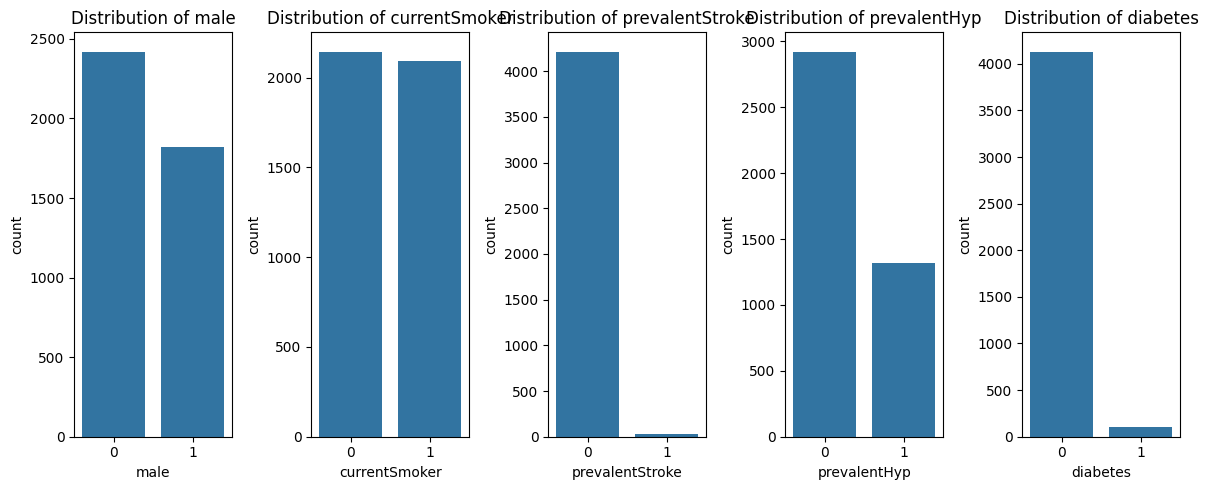

In [8]:
categorical_cols = ["male", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]
plt.figure(figsize= (12, 5))
for i, cols in enumerate(categorical_cols):
  plt.subplot(1, 5, i+1) # as it start from 0th idx that's why we wrote i + 1.
  sns.countplot(x= cols, data= df)
  plt.title(f'Distribution of {cols}')
plt.tight_layout()
plt.show()

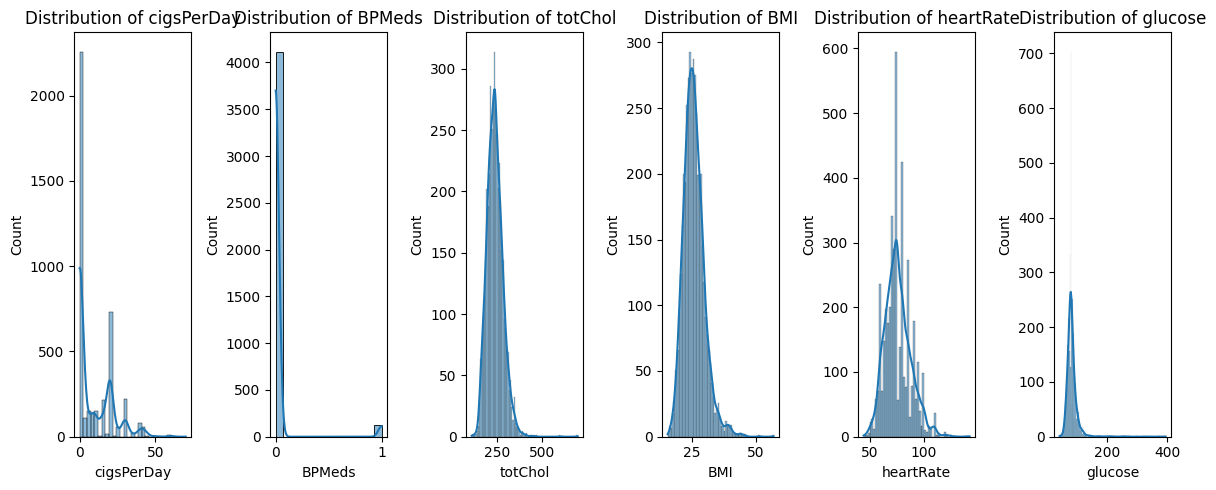

In [9]:
numeric_cols = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]
plt.figure(figsize= (12, 5))
for j, cols in enumerate(numeric_cols):
    plt.subplot(1, 6, j+1)
    sns.histplot(x= cols, data= df, kde= True)
    plt.title(f'Distribution of {cols}')
plt.tight_layout()
plt.show()

# Resampling

In [10]:
from sklearn.utils import resample

df_majority = df[df['TenYearCHD'] == 0]
df_minority = df[df['TenYearCHD'] == 1]

df_min_upsample = resample(df_minority, replace= True, n_samples= len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_min_upsample])

In [11]:
df_upsampled['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,3596


# Splitting Data

In [12]:
x = df_upsampled.drop(columns= ['TenYearCHD'])
y = df_upsampled['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
x_train.shape, x_test.shape

((5753, 14), (1439, 14))

In [13]:
ss = StandardScaler()
ss.fit_transform(x_train, y_train)
y_pred = ss.transform(x_test)

# Model Traning & Evaluation

In [14]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(accuracy_score(y_test, y_pred))
print(f'Report {classification_report(y_test, y_pred)}')
print(f'Matrix: {confusion_matrix(y_test, y_pred)}')
print(f'Score: {roc_auc_score(y_test, y_pred)}')

0.6518415566365532
Report               precision    recall  f1-score   support

           0       0.66      0.64      0.65       735
           1       0.64      0.66      0.65       704

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439

Matrix: [[472 263]
 [238 466]]
Score: 0.6520543444650588


# Model Traning & Evaluation (8 Models)

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [17]:
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

for clf in classifiers:
    print(f"\n--- {type(clf).__name__} ---")

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Calculating Accuracy:
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Calculating Confusion Matrix:
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

    # Calculating Classification Report:
    print(f'Report:\n{classification_report(y_test, y_pred)}')


--- RandomForestClassifier ---
Accuracy: 0.9742876997915219
Confusion Matrix:
[[703  32]
 [  5 699]]
Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       735
           1       0.96      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439


--- AdaBoostClassifier ---
Accuracy: 0.6518415566365532
Confusion Matrix:
[[447 288]
 [213 491]]
Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       735
           1       0.63      0.70      0.66       704

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439


--- GradientBoostingClassifier ---
Accuracy: 0.7289784572619875
Confusion Matrix:
[[508 227]
 [163 541]]
Report:
              pr

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6518415566365532
Confusion Matrix:
[[478 257]
 [244 460]]
Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       735
           1       0.64      0.65      0.65       704

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439


--- KNeighborsClassifier ---
Accuracy: 0.788047255038221
Confusion Matrix:
[[495 240]
 [ 65 639]]
Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       735
           1       0.73      0.91      0.81       704

    accuracy                           0.79      1439
   macro avg       0.81      0.79      0.79      1439
weighted avg       0.81      0.79      0.79      1439


--- DecisionTreeClassifier ---
Accuracy: 0.9117442668519805
Confusion Matrix:
[[611 124]
 [  3 701]]
Report:
              precision    recall  f1-score   suppo

In [20]:
res_df = pd.DataFrame(columns= ['Model', 'Accuracy', 'Confusion Matrix', 'Classification Report'])

for clf in classifiers:
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        res_df = pd.concat([res_df, pd.DataFrame({'Model': [type(clf).__name__], 'Accuracy': [acc], 'Confusion Matrix': [cm], 'Classification Report': [cr]})], ignore_index= True)

res_df

/tmp/ipython-input-20-849708275.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'Model': [type(clf).__name__], 'Accuracy': [acc], 'Confusion Matrix': [cm], 'Classification Report': [cr]})], ignore_index= True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_

,Model,Accuracy,Confusion Matrix,Classification Report
0,RandomForestClassifier,0.977067,"[[707, 28], [5, 699]]",precision recall f1-score ...
1,AdaBoostClassifier,0.651842,"[[447, 288], [213, 491]]",precision recall f1-score ...
2,GradientBoostingClassifier,0.728978,"[[508, 227], [163, 541]]",precision recall f1-score ...
3,LogisticRegression,0.651842,"[[472, 263], [238, 466]]",precision recall f1-score ...
4,SVC,0.651842,"[[478, 257], [244, 460]]",precision recall f1-score ...
5,KNeighborsClassifier,0.788047,"[[495, 240], [65, 639]]",precision recall f1-score ...
6,DecisionTreeClassifier,0.913829,"[[614, 121], [3, 701]]",precision recall f1-score ...
7,XGBClassifier,0.906185,"[[625, 110], [25, 679]]",precision recall f1-score ...


from matplotlib import pyplot as plt
res_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
res_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
res_df.groupby('Classification Report').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
res_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Classification Report'].value_counts()
    for x_label, grp in res_df.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Classification Report')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(res_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(res_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(res_df['Classification Report'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(res_df, x='Accuracy', y='Classification Report', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Best Performing Model.

In [21]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.9715079916608756
Confusion Matrix:
[[699  36]
 [  5 699]]
Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       735
           1       0.95      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439



# Model Prediction

In [34]:
def predict(rf_clf, male, age,currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose):
    male_encoded = 1 if male.lower() == 'male' else 0
    currentSmoker_encoded = 1 if currentSmoker.lower() == 'yes' else 0
    BPMeds_encoded = 1 if BPMeds.lower() == 'yes' else 0
    prevalentStroke_encoded = 1 if prevalentStroke.lower() == 'yes' else 0
    prevalentHyp_encoded = 1 if prevalentHyp.lower() == 'yes' else 0
    diabetes_encoded = 1 if diabetes.lower() == 'yes' else 0
# Converting into 2D Array.
    features = np.array([[male_encoded, age, currentSmoker_encoded, cigsPerDay, BPMeds_encoded, prevalentStroke_encoded, prevalentHyp_encoded, diabetes_encoded, totChol, sysBP, diaBP, BMI, heartRate, glucose]])
    result = rf_clf.predict(features)
    return result[0]

In [33]:
import warnings
warnings.filterwarnings('ignore')

male = "female"
age = 56.00
currentSmoker = "yes"
cigsPerDay = 3.00
BPMeds = "no"
prevalentStroke = "no"
prevalentHyp = "yes"
diabetes = 'no'
totChol = 285.00
sysBP = 145.00
diaBP = 100.00
BMI = 30.14
heartRate = 80.00
glucose = 86.00

result = predict(rf_clf, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)
print(result)

if result == 1:
    print('The Patient has Heart Disease.')
else:
    print("The Patient doesn't have Heart Disease. ")

0
The Patient doesn't have Heart Disease. 


# Saving Model

In [22]:
import pickle
pickle.dump(rf_clf, open('rf_clf.pkl', 'wb'))
pickle.dump(lr, open('logistic_reg.pkl', 'wb'))

In [23]:
with open('rf_clf.pkl', 'rb') as f:
    model = pickle.load(f)

with open('logistic_reg.pkl', 'rb') as f:
      model = pickle.load(f)